# ML Assignment 1 : Perceptron
### Anirudh Agrawal: 2018A7PS0099H | Aviral Agarwal: 2018A7PS0192H | Vikramjeet Das: 2018A7PS0280H

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

%matplotlib inline

In [3]:
ds1 = pd.read_csv('dataset_LP_1.txt', header=None)
ds2 = pd.read_csv('dataset_LP_2.csv', header=None)
X1 = ds1[[0,1,2,3]]
y1 = ds1[4]
X2 = ds2[[0,1,2]]
y2 = ds2[3]

In [4]:
def shuffle(X, y):
    '''
        Shuffles rows of a dataframe and returns shuffled dataframe
    '''
    permute = np.random.permutation(len(X))
    return X[permute], y[permute]

def train_test_split(X, y, test_size=0.3):
    '''
        Splits data into train-test split
            
            Parameters:
                X : Features
                y : Labels
                test_size : Fraction of data to use for test set
            
            Returns:
                (X_train, y_train, X_test, y_test) : Train test split
    '''
    if not isinstance(X, np.ndarray):
        X = np.array(X)
    if not isinstance(y, np.ndarray):
        y = np.array(y)
        
    X, y = shuffle(X, y)
        
    test_indices = np.random.rand(X.shape[0]) < test_size
    return X[~test_indices], y[~test_indices], X[test_indices], y[test_indices]

In [5]:
X_train1, y_train1, X_test1, y_test1 = train_test_split(X1, y1)
X_train2, y_train2, X_test2, y_test2 = train_test_split(X2, y2)

In [6]:
class Perceptron:
    def __init__(self, include_bias=True, tol=10e-3):
        self.include_bias = include_bias
        self.tol = tol
        
    def train(self, X, y, lr=1, max_epochs=10000, min_epochs=2000):
        assert X.shape[0] == y.shape[0], 'Data and target count do not match'
        assert len(np.unique(y)) == 2, 'Targets cannot have more than 2 classes'
        self.misclassifications = [] # For plotting purposes
        
        # Add bias term if not included
        if self.include_bias:
            X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
        # Initialize weights
        self.weights = np.zeros((X.shape[1],))
        
        # To generalize to labels beyond -1/1
        # Can also accept 0/1 (or any other binary label) 
        # with the same expressions
        self.neg_value = np.min(y)
        self.pos_value = np.max(y)
        
        # Train and plot
        self.__sgd(X, y, lr, max_epochs, min_epochs)
        plt.plot(range(len(self.misclassifications)), self.misclassifications)
        
    def __sgd(self, X, y, lr, max_epochs, min_epochs):
        # For all epochs
        for epoch in tqdm(range(max_epochs)):
            n_misclassified = 0
            # For all examples in dataset
            for row, target in zip(X, y):
                # Predict class of data point
                pred = self.__predict(row)
                n_misclassified += not (pred == target)
                # Sign is 0 is correct prediction, +1 if false negative, -1 if false positive
                misclassified = 0 if (pred == target) else (1 if target == self.pos_value else -1)
                self.weights += lr * misclassified * row # Add obs if false negative, subtract if false positive
            
            self.misclassifications.append(n_misclassified)
            
            # Improvement from the average over last 10 epochs is less than tol and at least after 2000 epochs
            if (sum(self.misclassifications[-11:-1])/(10 * len(X)) - (n_misclassified / len(X)) < self.tol and epoch > min_epochs):
                break
            
    def __get_class(self, x):
        return self.pos_value if x > 0 else self.neg_value
        
    def __predict(self, X):
        y = np.dot(X, self.weights)
        return self.__get_class(y)
    
    def predict(self, X):
        if self.include_bias:
            X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1)
        y = np.dot(X, self.weights)
        return np.array(list(map(self.__get_class, y))).reshape(y.shape)
    
    def evaluate(self, X, y):
        preds = self.predict(X)
        return np.sum(preds == y) / len(X)

  0%|          | 0/10000 [00:00<?, ?it/s]

0.9926289926289926


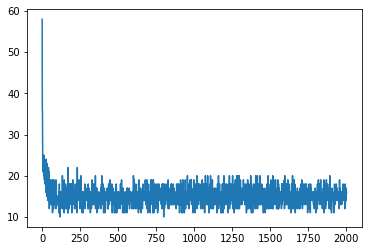

In [7]:
p1 = Perceptron()
p1.train(X_train1, y_train1)
print(p1.evaluate(X_test1, y_test1))

  0%|          | 0/10000 [00:00<?, ?it/s]

1.0


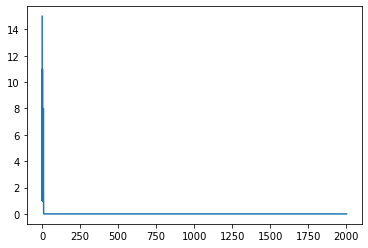

In [8]:
p2 = Perceptron()
p2.train(X_train2, y_train2)
print(p2.evaluate(X_test2, y_test2))